In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Project Planning
- Audience: potential consumers planning airline travel.
- Utilize classification modeling to determine if a flight will be delayed.
- Find key features that drive flight delays.

**Initial Hypothesis**
- Time of day will impact delay times.
- Day of the week will impact delay times. 
- Carrier will impact delay times.
- Airport location will impact delay times.



**Additional data requested for better analysis.**



#### What's in the data?
- **Year** 2008
- **Month** 1-12
- **DayofMonth** 1-31
- **DayOfWeek** 1 (Monday) - 7 (Sunday)
- **DepTime** actual departure time (local, hhmm)
- **CRSDepTime** scheduled departure time (local, hhmm)
- **ArrTime** actual arrival time (local, hhmm)
- **CRSArrTime** scheduled arrival time (local, hhmm)
- **UniqueCarrier** unique carrier code
- **FlightNum** flight number
- **TailNum** plane tail number: aircraft registration, unique aircraft identifier
- **ActualElapsedTime** in minutes
- **CRSElapsedTime** in minutes
- **AirTime** in minutes
- **ArrDelay** arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
- **DepDelay** departure delay, in minutes
- **Origin** origin IATA airport code
- **Dest** destination IATA airport code
- **Distance** in miles
- **TaxiIn** taxi in time, in minutes
- **TaxiOut** taxi out time in minutes
- **Cancelled** *was the flight cancelled
- **CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
- **Diverted** 1 = yes, 0 = no
- **CarrierDelay in minutes:** The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
- **WeatherDelay in minutes:** Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
- **NASDelay in minutes:** Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
- **LateAircraftDelay in minutes::** A previous flight with same aircraft arrived late, causing the present flight to depart late.
- **SecurityDelay in minutes:** Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

### Acquire

- Data was acquired from [kaggle](https://www.kaggle.com/datasets/giovamata/airlinedelaycauses?select=DelayedFlights.csv), with the original datset coming from the U.S. Department of Transportation - Bureau of Transportation Satistics.

- Comprised of airline data from January to December 2008.

In [41]:
df = pd.read_csv('DelayedFlights.csv')
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [42]:
df.shape

(1936758, 30)

### Prepare

In [4]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df.isna().mean()

Year                 0.000000
Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
DepTime              0.000000
CRSDepTime           0.000000
ArrTime              0.003671
CRSArrTime           0.000000
UniqueCarrier        0.000000
FlightNum            0.000000
TailNum              0.000003
ActualElapsedTime    0.004330
CRSElapsedTime       0.000102
AirTime              0.004330
ArrDelay             0.004330
DepDelay             0.000000
Origin               0.000000
Dest                 0.000000
Distance             0.000000
TaxiIn               0.003671
TaxiOut              0.000235
Cancelled            0.000000
CancellationCode     0.000000
Diverted             0.000000
CarrierDelay         0.355889
WeatherDelay         0.355889
NASDelay             0.355889
SecurityDelay        0.355889
LateAircraftDelay    0.355889
dtype: float64

### Notes
- type of delays has A LOT of nulls, let's see what's going on here.
- 35% of the columns in delay type are null values but there's not way to acurratelly fill data, dropping these nulls will still leave over a million data points.

In [7]:
df = df.dropna()

In [8]:
df.shape

(1247486, 29)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247486 entries, 3 to 1936755
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1247486 non-null  int64  
 1   Month              1247486 non-null  int64  
 2   DayofMonth         1247486 non-null  int64  
 3   DayOfWeek          1247486 non-null  int64  
 4   DepTime            1247486 non-null  float64
 5   CRSDepTime         1247486 non-null  int64  
 6   ArrTime            1247486 non-null  float64
 7   CRSArrTime         1247486 non-null  int64  
 8   UniqueCarrier      1247486 non-null  object 
 9   FlightNum          1247486 non-null  int64  
 10  TailNum            1247486 non-null  object 
 11  ActualElapsedTime  1247486 non-null  float64
 12  CRSElapsedTime     1247486 non-null  float64
 13  AirTime            1247486 non-null  float64
 14  ArrDelay           1247486 non-null  float64
 15  DepDelay           1247486 non-n

In [10]:
### Notes - all time is in minutes, with whole numbers, can covert to int64 types
nums = df.select_dtypes(np.number)
df[nums.columns]= nums.astype(int)


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1247486.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,1247486.0,6.065399,3.508937,1.0,3.0,6.0,9.0,12.0
DayofMonth,1247486.0,15.725417,8.793008,1.0,8.0,16.0,23.0,31.0
DayOfWeek,1247486.0,3.980082,1.993270,1.0,2.0,4.0,6.0,7.0
DepTime,1247486.0,1558.831926,454.330025,1.0,1232.0,1618.0,1924.0,2400.0
CRSDepTime,1247486.0,1487.949108,421.178173,0.0,1150.0,1529.0,1830.0,2359.0
ArrTime,1247486.0,1616.748897,583.941629,1.0,1326.0,1737.0,2048.0,2400.0
CRSArrTime,1247486.0,1652.457673,461.737224,0.0,1340.0,1722.0,2022.0,2359.0
FlightNum,1247486.0,2276.526036,1997.547303,1.0,637.0,1589.0,3676.0,9741.0
ActualElapsedTime,1247486.0,135.377890,72.296363,14.0,83.0,118.0,167.0,1114.0


In [12]:
for col in df.columns:
    print(df[col].value_counts())

2008    1247486
Name: Year, dtype: int64
12    141373
6     136515
3     130999
2     128743
1     120786
7     119404
8     100602
4      97624
5      94771
11     63785
10     57079
9      55805
Name: Month, dtype: int64
22    48632
21    46162
7     44638
1     44304
27    43195
4     42653
15    42138
8     41784
20    41761
10    41700
19    41385
18    41025
14    41022
23    40875
26    40871
11    40547
6     40290
2     40165
24    39726
17    39518
9     39449
13    39102
12    38941
16    38255
5     38226
3     38111
28    37844
25    36828
30    36452
29    35015
31    26872
Name: DayofMonth, dtype: int64
5    214235
4    186860
1    186860
7    185184
2    169909
3    167704
6    136734
Name: DayOfWeek, dtype: int64
1800    2330
2000    2257
1900    2241
1700    2183
1730    2124
        ... 
414        1
439        1
457        1
420        1
425        1
Name: DepTime, Length: 1435, dtype: int64
1800    9595
1700    9287
1900    8951
1855    8662
1850    8451
        ..

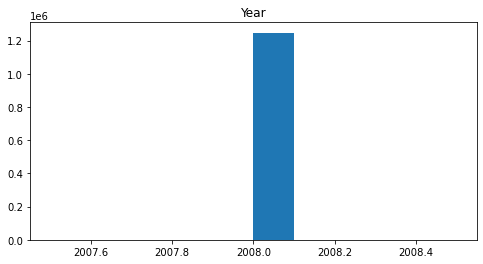

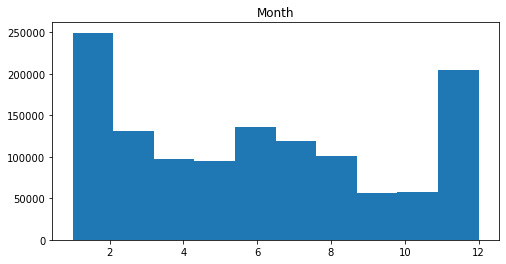

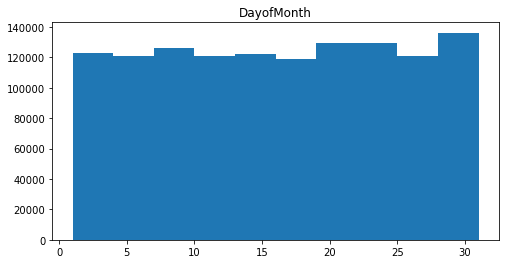

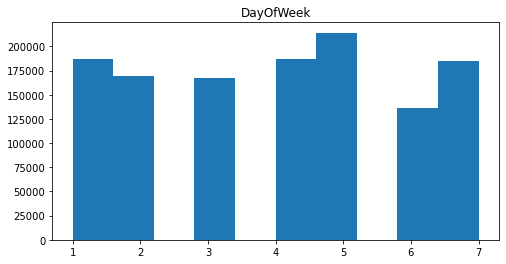

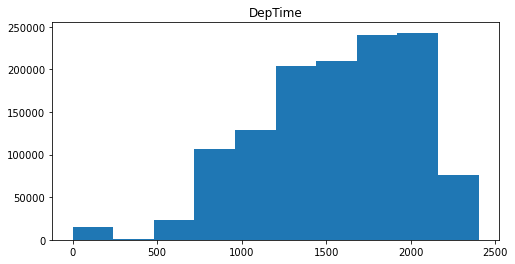

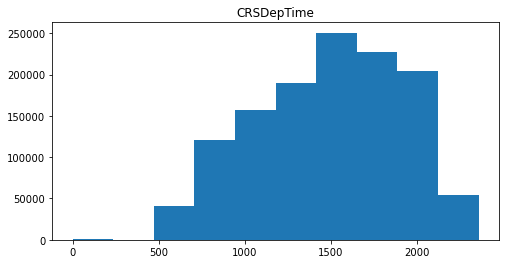

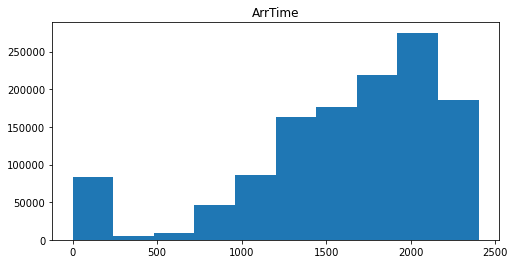

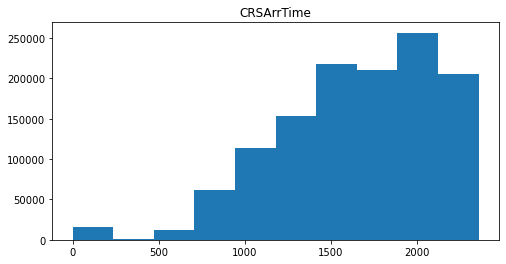

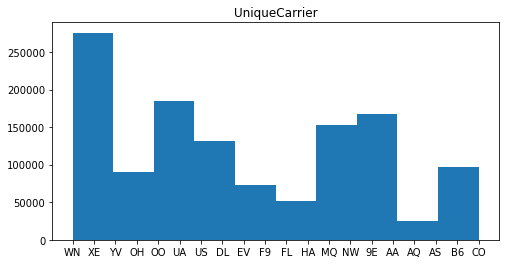

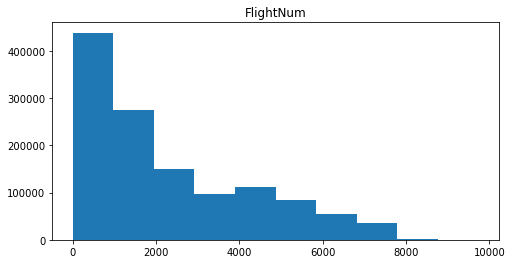

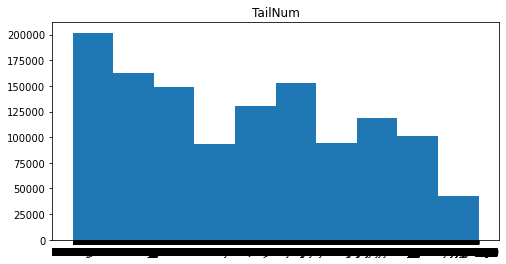

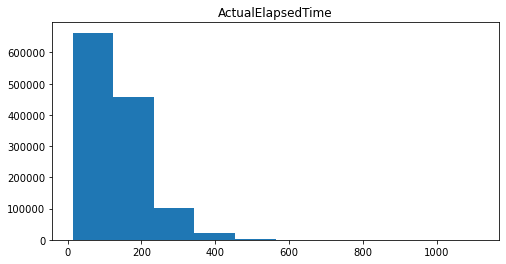

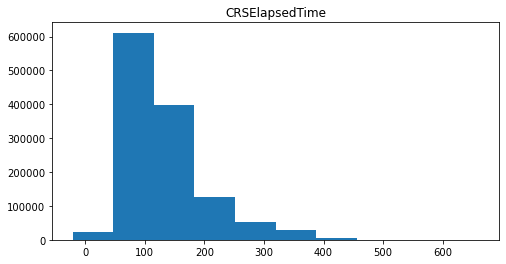

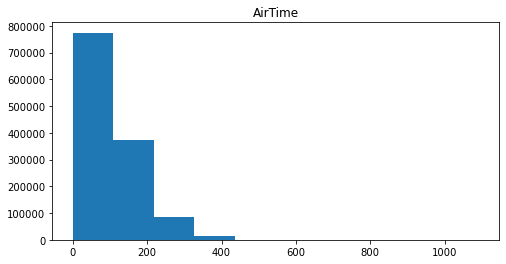

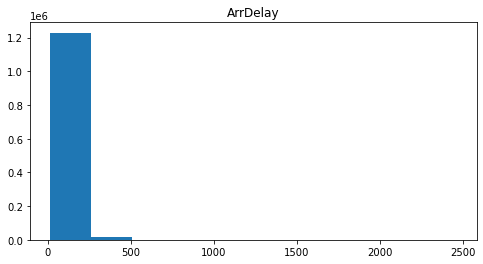

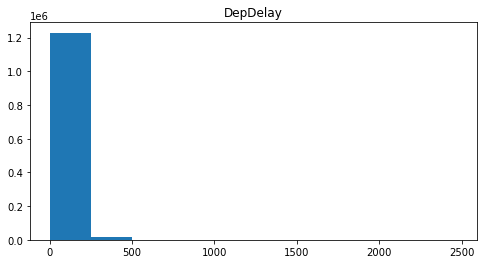

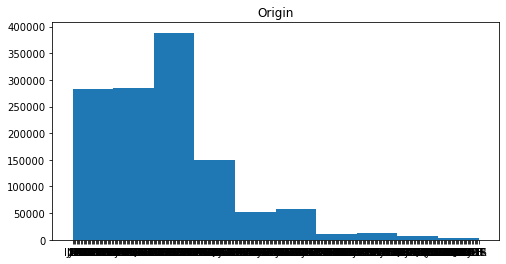

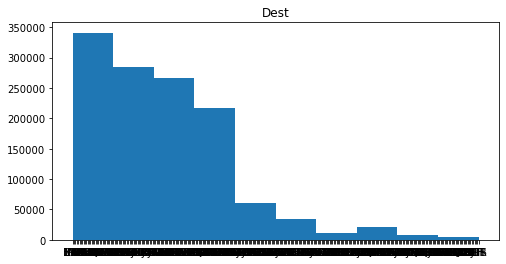

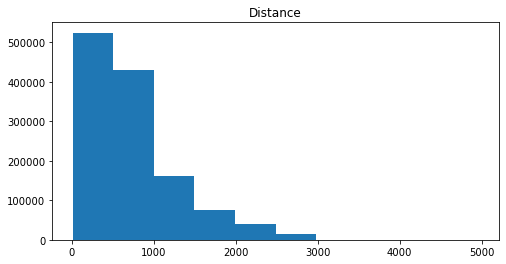

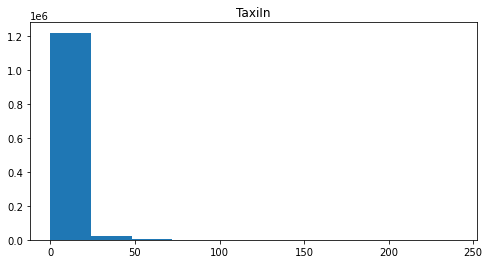

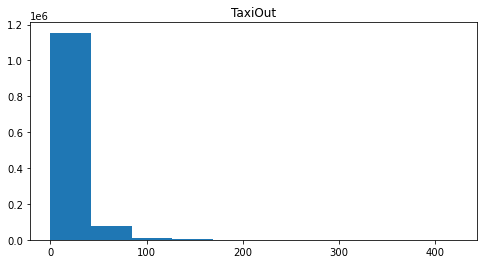

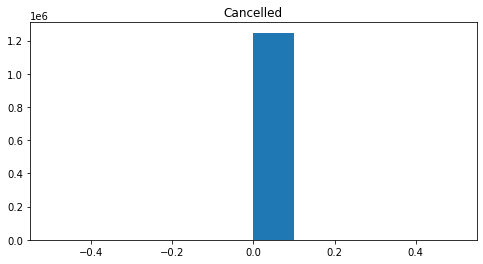

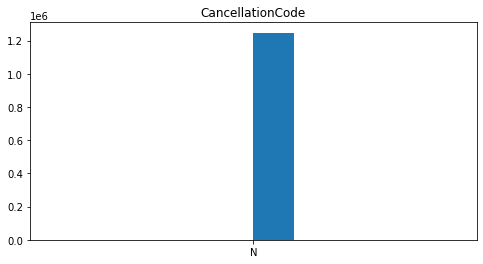

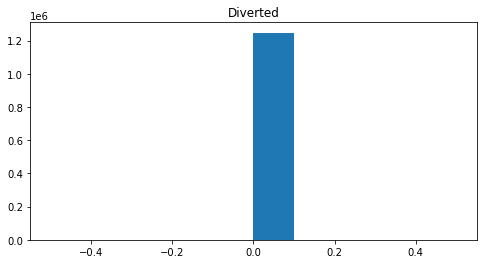

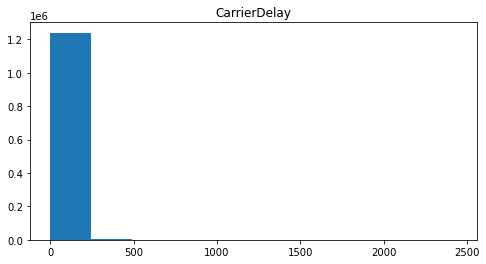

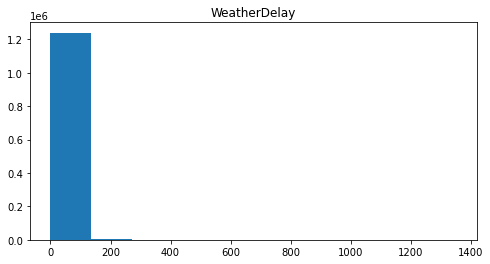

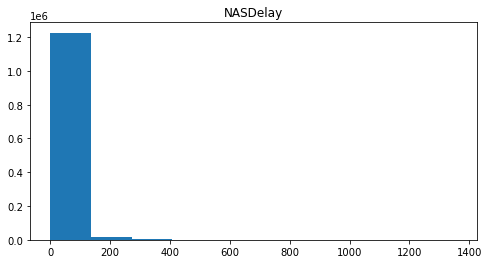

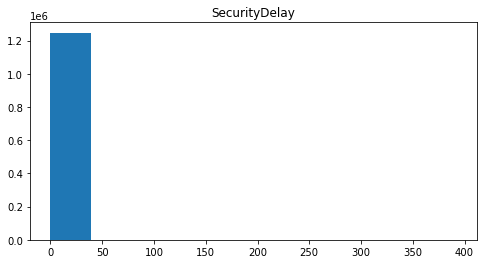

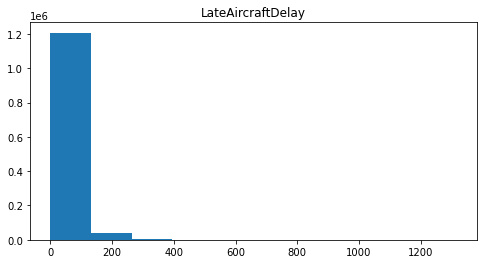

In [13]:
for col in df.columns:
    plt.figure(figsize=(8,4))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

### Notes - Reducing dataframe to top 5 busiest airports and top 6 most frequently used airlines


- **Airlines to keep**
- WN - Southwest  
- AA - American Airlines   
- MQ - Envoy   
- UA - United Airlines   
- OO - SkyWest   
- DL - Delta  


- **Airports to keep** 
- ATL - Atlanta
- ORD - Orlando
- DFW - Dallas(Fort Worth)
- DEN - Denver    
- LAX - Los Angeles    


In [14]:
df = df[df.UniqueCarrier.str.contains('WN|AA|MQ|UA|OO|DL')]

In [15]:
df = df[df.Origin.str.contains('ATL|ORL|DFW|DEN|LAX') & df.Dest.str.contains('ATL|ORL|DFW|DEN|LAX')]

In [16]:
df.Dest.value_counts(), df.Origin.value_counts()

(DFW    3794
 LAX    3709
 DEN    2971
 ATL    2372
 Name: Dest, dtype: int64,
 DFW    4369
 ATL    2891
 DEN    2815
 LAX    2771
 Name: Origin, dtype: int64)

In [17]:
df.head().T

,51640,53353,53354,54134,54135
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,1,4,4,5,5
DayOfWeek,2,5,5,6,6
DepTime,1436,2122,1450,1448,1248
CRSDepTime,1429,2020,1429,1429,1237
ArrTime,1937,2316,1944,1942,1419
CRSArrTime,1922,2138,1922,1922,1355
UniqueCarrier,OO,OO,OO,OO,OO
FlightNum,6219,6210,6219,6219,6229


<AxesSubplot:xlabel='UniqueCarrier', ylabel='ArrDelay'>

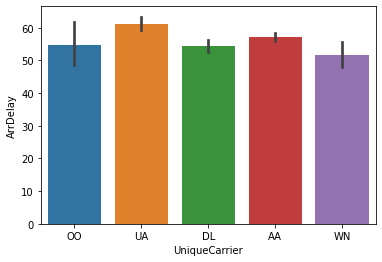

In [18]:
sns.barplot(data=df, x=df.UniqueCarrier, y=df.ArrDelay)

### Notes- all ArrDelays will only be listed if 15 minutes or longer, need to catagorize data to amounts of time

In [19]:
#Status represents wether the flight was on time (0), more than 15 minutes delayed (1), 
# more than 60 minutes delayed (2), more than 120 minutes delayed (3),more than 350 minutes delayed (4)
for data in df:
    df.loc[df['ArrDelay'] <= 15, 'Delayed_Status'] = 0
    df.loc[df['ArrDelay'] > 15, 'Delayed_Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Delayed_Status'] = 2
    df.loc[df['ArrDelay'] >= 120, 'Delayed_Status'] = 3
    df.loc[df['ArrDelay'] >= 300, 'Delayed_Status'] = 4

In [20]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed_Status
51640,2008,1,1,2,1436,1429,1937,1922,OO,6219,...,12,0,N,0,15,0,0,0,0,0.0
53353,2008,1,4,5,2122,2020,2316,2138,OO,6210,...,27,0,N,0,0,0,0,0,98,2.0
53354,2008,1,4,5,1450,1429,1944,1922,OO,6219,...,22,0,N,0,22,0,0,0,0,1.0
54134,2008,1,5,6,1448,1429,1942,1922,OO,6219,...,25,0,N,0,0,0,0,0,20,1.0
54135,2008,1,5,6,1248,1237,1419,1355,OO,6229,...,26,0,N,0,24,0,0,0,0,1.0


In [21]:
df['Delayed'] = np.where(df['Delayed_Status']== 0, 0, 1)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed_Status,Delayed
51640,2008,1,1,2,1436,1429,1937,1922,OO,6219,...,0,N,0,15,0,0,0,0,0.0,0
53353,2008,1,4,5,2122,2020,2316,2138,OO,6210,...,0,N,0,0,0,0,0,98,2.0,1
53354,2008,1,4,5,1450,1429,1944,1922,OO,6219,...,0,N,0,22,0,0,0,0,1.0,1
54134,2008,1,5,6,1448,1429,1942,1922,OO,6219,...,0,N,0,0,0,0,0,20,1.0,1
54135,2008,1,5,6,1248,1237,1419,1355,OO,6229,...,0,N,0,24,0,0,0,0,1.0,1


<AxesSubplot:>

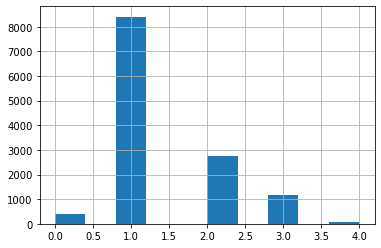

In [22]:
df.Delayed_Status.hist()

Determine columns to drop

- keeping CRSDepTime/ArrTime since that is when the flight was scheduled to depart and arrive - which will lend to not planning a trip at time if we can determine a likelihood of delay
- FlightNum is not relevant, TailNum might be(repeated maintance on one aircraft)
- will keep CRSElapsed time instead of Actual(flight length might correspond to delays) and scheduled time is the same as other time variables
- DepDelay does not matter if the aircraft recovered time (but might be something to look into, so I'll keep it
- TaxiIn and TaxiOut
- Cancelled - no flights were cancelled
- CancellationCode - same as above
- Diverted - no flights were diverted

In [23]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Delayed_Status', 'Delayed'],
      dtype='object')

In [24]:
df.Cancelled.value_counts()

0    12846
Name: Cancelled, dtype: int64

In [25]:
df.CancellationCode.value_counts()

N    12846
Name: CancellationCode, dtype: int64

In [26]:
df.Diverted.value_counts()

0    12846
Name: Diverted, dtype: int64

In [27]:
df.drop(columns=['DepTime','ArrTime', 'FlightNum','ActualElapsedTime','ArrDelay','DepDelay', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted'], axis=1, inplace=True)

In [28]:
df.shape

(12846, 20)

In [29]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,TailNum,CRSElapsedTime,AirTime,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed_Status,Delayed
51640,2008,1,1,2,1429,1922,OO,N772SK,173,153,LAX,DFW,1235,15,0,0,0,0,0.0,0
53353,2008,1,4,5,2020,2138,OO,N767SK,198,195,DFW,LAX,1235,0,0,0,0,98,2.0,1
53354,2008,1,4,5,1429,1922,OO,N767SK,173,146,LAX,DFW,1235,22,0,0,0,0,1.0,1
54134,2008,1,5,6,1429,1922,OO,N768SK,173,143,LAX,DFW,1235,0,0,0,0,20,1.0,1
54135,2008,1,5,6,1237,1355,OO,N768SK,198,177,DFW,LAX,1235,24,0,0,0,0,1.0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12846 entries, 51640 to 1936654
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               12846 non-null  int64  
 1   Month              12846 non-null  int64  
 2   DayofMonth         12846 non-null  int64  
 3   DayOfWeek          12846 non-null  int64  
 4   CRSDepTime         12846 non-null  int64  
 5   CRSArrTime         12846 non-null  int64  
 6   UniqueCarrier      12846 non-null  object 
 7   TailNum            12846 non-null  object 
 8   CRSElapsedTime     12846 non-null  int64  
 9   AirTime            12846 non-null  int64  
 10  Origin             12846 non-null  object 
 11  Dest               12846 non-null  object 
 12  Distance           12846 non-null  int64  
 13  CarrierDelay       12846 non-null  int64  
 14  WeatherDelay       12846 non-null  int64  
 15  NASDelay           12846 non-null  int64  
 16  SecurityDelay   

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,12846.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,12846.0,6.093103,3.353317,1.0,3.0,6.0,8.0,12.0
DayofMonth,12846.0,15.761871,8.715228,1.0,8.0,16.0,23.0,31.0
DayOfWeek,12846.0,3.984275,1.997640,1.0,2.0,4.0,6.0,7.0
CRSDepTime,12846.0,1452.256578,448.941803,10.0,1122.0,1455.0,1815.0,2355.0
CRSArrTime,12846.0,1659.090067,465.738592,5.0,1344.0,1730.0,2022.0,2359.0
CRSElapsedTime,12846.0,164.664721,49.138792,105.0,127.0,145.0,190.0,317.0
AirTime,12846.0,138.423322,49.251560,63.0,102.0,120.0,163.0,316.0
Distance,12846.0,1014.780087,400.230057,641.0,732.0,862.0,1235.0,1946.0
CarrierDelay,12846.0,21.081582,38.641358,0.0,0.0,9.0,24.0,859.0


In [32]:
def integers(df):
    """This function converts datatypes to integers for the given columns."""
    df['CRSElapsedTime'] = df['CRSElapsedTime'].astype('int64')
    df['ArrDelay'] = df['ArrDelay'].astype('int64')
    df['AirTime'] = df['AirTime'].astype('int64')
    df['DepDelay'] = df['DepDelay'].astype('int64')
    df['CarrierDelay'] = df['CarrierDelay'].astype('int64')
    df['WeatherDelay'] = df['WeatherDelay'].astype('int64')
    df['NASDelay'] = df['NASDelay'].astype('int64')
    df['SecurityDelay'] = df['SecurityDelay'].astype('int64')
    df['LateAircraftDelay'] = df['LateAircraftDelay'].astype('int64')
    df['Delayed_Status'] = df['Delayed_Status'].astype('int64')
    return df

In [33]:
def prepare_flight_data(df):
    df = df.dropna()
    df = remove_columns(df,cols_to_remove)
    for data in df:
        df.loc[df['ArrDelay'] <= 15, 'Delayed_Status'] = 0
        df.loc[df['ArrDelay'] > 15, 'Delayed_Status'] = 1
        df.loc[df['ArrDelay'] >= 60, 'Delayed_Status'] = 2
        df.loc[df['ArrDelay'] >= 120, 'Delayed_Status'] = 3
        df.loc[df['ArrDelay'] >= 350, 'Delayed_Status'] = 4
    df = integers(df)
    df = df[df.UniqueCarrier.str.contains('WN|AA|MQ|UA|OO|DL')]
    df = df[df.Origin.str.contains('ATL|ORL|DFW|DEN|LAX') & df.Dest.str.contains('ATL|ORL|DFW|DEN|LAX')]
    return df
    

In [34]:
df = pd.read_csv('DelayedFlights.csv')
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [35]:
cols_to_remove = ['Unnamed: 0','DepTime','ArrTime', 'FlightNum','ActualElapsedTime', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted']
def remove_columns(df, cols_to_remove):
    '''This function removes columns(cols_to_remove) from the dataframe due to duplicates or
    erroneous data.'''
    df = df.drop(columns=cols_to_remove)
    return df

In [36]:
df = prepare_flight_data(df)
df.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,TailNum,CRSElapsedTime,AirTime,...,DepDelay,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed_Status
51640,2008,1,1,2,1429,1922,OO,N772SK,173,153,...,7,LAX,DFW,1235,15,0,0,0,0,0
53353,2008,1,4,5,2020,2138,OO,N767SK,198,195,...,62,DFW,LAX,1235,0,0,0,0,98,2
53354,2008,1,4,5,1429,1922,OO,N767SK,173,146,...,21,LAX,DFW,1235,22,0,0,0,0,1
54134,2008,1,5,6,1429,1922,OO,N768SK,173,143,...,19,LAX,DFW,1235,0,0,0,0,20,1
54135,2008,1,5,6,1237,1355,OO,N768SK,198,177,...,11,DFW,LAX,1235,24,0,0,0,0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12846 entries, 51640 to 1936654
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               12846 non-null  int64 
 1   Month              12846 non-null  int64 
 2   DayofMonth         12846 non-null  int64 
 3   DayOfWeek          12846 non-null  int64 
 4   CRSDepTime         12846 non-null  int64 
 5   CRSArrTime         12846 non-null  int64 
 6   UniqueCarrier      12846 non-null  object
 7   TailNum            12846 non-null  object
 8   CRSElapsedTime     12846 non-null  int64 
 9   AirTime            12846 non-null  int64 
 10  ArrDelay           12846 non-null  int64 
 11  DepDelay           12846 non-null  int64 
 12  Origin             12846 non-null  object
 13  Dest               12846 non-null  object
 14  Distance           12846 non-null  int64 
 15  CarrierDelay       12846 non-null  int64 
 16  WeatherDelay       12846 non-null 

In [38]:
df.shape

(12846, 21)

In [39]:
dummy_df = pd.get_dummies(df[['UniqueCarrier']], dummy_na=False, drop_first=[False])
df = pd.concat([df, dummy_df], axis=1)

In [40]:
df[df.UniqueCarrier=='AA']

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,TailNum,CRSElapsedTime,AirTime,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed_Status,UniqueCarrier_DL,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_WN
146353,2008,1,10,4,650,810,AA,N3BRAA,140,117,...,13,0,3,0,0,1,0,0,0,0
146354,2008,1,12,6,650,810,AA,N3APAA,140,119,...,0,6,9,0,0,0,0,0,0,0
146355,2008,1,19,6,650,810,AA,N3CXAA,140,127,...,0,16,23,0,0,1,0,0,0,0
146356,2008,1,20,7,650,810,AA,N3BDAA,140,119,...,0,15,23,0,0,1,0,0,0,0
146357,2008,1,27,7,650,810,AA,N3BBAA,140,126,...,0,15,15,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910522,2008,12,17,3,2140,2305,AA,N3ANAA,205,184,...,9,0,13,0,0,1,0,0,0,0
1910523,2008,12,18,4,2140,2305,AA,N3BYAA,205,186,...,73,15,3,0,3,2,0,0,0,0
1910525,2008,12,24,3,2140,2305,AA,N3BYAA,205,188,...,10,0,5,0,0,0,0,0,0,0
1910526,2008,12,27,6,2140,2305,AA,N3CFAA,205,156,...,0,18,0,0,16,1,0,0,0,0
